In [67]:
%pylab inline
import scipy

from pyiga import bspline, assemble, geometry, solvers, vis, topology, vform

from scipy.io import mmwrite

%pylab is deprecated, use %matplotlib inline and import the required libraries.
Populating the interactive namespace from numpy and matplotlib


In [68]:
numpy.set_printoptions(linewidth=100000)

setting up constraints took 0.003777027130126953 seconds.
Basis setup took 0.004867076873779297 seconds


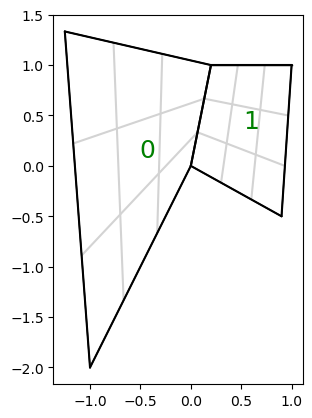

In [91]:
deg, N = 2,3

geo1 = geometry.Quad(np.array([[0,0],[-1,-2],[1/5,1],[-5/4,4/3]]).T)
geo2 = geometry.Quad(np.array([[0,0],[9/10,-1/2],[1/5,1],[1,1]]).T)

#geo1=geometry.unit_square()
#geo2=geometry.unit_square().translate((1,0))
kvs = 2 * (bspline.make_knots(deg, 0.0, 1.0, N),)

M = topology.PatchMesh([(kvs,geo1),(kvs,geo2)])
MP = assemble.Multipatch(M, automatch=1)
M.draw(knots=1,patch_idx=1)

In [101]:
Ah = MP.assemble_volume('(u * v) * dx', arity=2, decoupled=1).tocsr()

In [102]:
Ah.shape

(50, 50)

In [103]:
Ah[25:,25:].toarray()

array([[4.49382716e-03, 2.68724280e-03, 3.90946502e-04, 0.00000000e+00, 0.00000000e+00, 2.58847737e-03, 1.54835391e-03, 2.25308642e-04, 0.00000000e+00, 0.00000000e+00, 3.66255144e-04, 2.19135802e-04, 3.18930041e-05, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [2.68724280e-03, 8.01646091e-03, 5.20781893e-03, 2.20164609e-04, 0.00000000e+00, 1.54835391e-03, 4.62139918e-03, 3.00360082e-03, 1.27057613e-04, 0.00000000e+00, 2.19135802e-04, 6.54320988e-04, 4.25411523e-04, 1.80041152e-05, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [3.90946502e-04, 5.20781893e-03, 1.45308642e-02, 5.80041152e-03, 4.89711934e-04, 2.25308642e-04, 3.00360082e-03, 8.38580247e-03, 3.34927984e-03, 2.82921811e-04, 3.18930041e-05

In [ ]:
Ah[]

In [97]:
#u = lambda x,y: x+y
Ah = MP.assemble_volume('(tr(hess(u)) * tr(hess(v))) * dx', arity=2, decoupled=1)

#Mh = MP.assemble_volume('(u * v) * dx', arity=2, decoupled=0)
#Uh = MP.assemble_volume('f * v * dx', f=u ,arity=1, decoupled=0)
#u_ = solvers.make_solver(Mh)@Uh

In [100]:
Ah.toarray()

array([[2867.87115978, -903.75562893,  -30.05988815, ...,    0.        ,    0.        ,    0.        ],
       [-903.75562893,  531.96752771,   -3.86547076, ...,    0.        ,    0.        ,    0.        ],
       [ -30.05988815,   -3.86547076,   73.39488706, ...,    0.        ,    0.        ,    0.        ],
       ...,
       [   0.        ,    0.        ,    0.        , ...,   21.64764552,  -18.91359319,   13.63218853],
       [   0.        ,    0.        ,    0.        , ...,  -18.91359319,   35.94282787,  -26.27974564],
       [   0.        ,    0.        ,    0.        , ...,   13.63218853,  -26.27974564,   26.26849764]])

In [27]:
mmwrite("biharmonic_stiffness_p"+str(deg)+"_n"+str(N)+"_r"+str(deg-1)+".mtx", Ah)

In [103]:
#Ah@u_

array([-9.86468400e-08,  8.00889666e-09,  6.44718057e-10,  3.92219590e-12, -5.11590770e-13,  6.53699317e-12, -1.51203494e-11,  6.93489710e-12,  8.83917650e-08,  8.55767723e-09, -3.13150395e-10, -2.82796009e-12,  9.62785407e-12, -2.66453526e-11,  3.33528760e-11, -1.32160949e-11, -4.67104666e-09, -2.40227749e-09, -6.35438369e-11, -7.86215537e-12, -7.87636623e-12,  1.59730007e-11, -1.23989707e-11,  8.27782287e-13,  1.10970788e-10,  2.60711452e-11, -1.60582658e-12, -1.16440191e-12,  5.71809267e-12, -7.97406585e-12,  5.53307400e-12, -4.51638726e-13, -9.93605198e-12,  2.08277839e-12,  3.94351218e-13,  2.29885555e-13, -1.82054372e-12,  2.92477154e-12, -2.24709140e-12, -4.16777723e-13,  4.52970994e-13, -4.07229805e-13, -5.72875081e-14, -2.48467913e-13,  8.08075828e-13, -1.06098463e-12,  3.95350419e-13,  1.33448808e-13,  5.86197757e-13,  1.07691633e-13,  2.30926389e-14,  3.21964677e-14, -1.47881707e-13,  3.08197912e-13, -3.09086090e-13,  6.83897383e-14, -6.53699317e-13,  1.33226763e-14, -1.3322